In [1]:
#########################################################################
# CBD3375_2 Capstone Project                                            #
#                                                                       #
# Team Member                                                           #
# 1. Apinya Theerawitthayawut         C0874071                          #
# 2. Divya Diddi                      C0872752                          #
# 3. Ivneet Kaur Ivneet Kaur          C0879831                          #
# 4. Rohit Rana                       C0872294                          #
# 5. Smit Bhaveshbhai Kalkani         C0872757                          #
#########################################################################

In [131]:
# Import pandas before use DataFrame
import pandas as pd

In [132]:
# Read CSV dataset to the DataFrame
tweeter_df = pd.read_csv('cyberbullying_tweets.csv')

In [133]:
# Print the imported DataFrame (only the first 5 rows)
tweeter_df.head(5)

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [134]:
# Analyze columns data types
tweeter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [135]:
# Rename column name for easier to reference
tweeter_df = tweeter_df.rename(columns = {
    'tweet_text': 'text', 
    'cyberbullying_type': 'type'
})

# Check new columns
tweeter_df.head(5)

,text,type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [136]:
# Checking null value
tweeter_df.isnull().sum()

text    0
type    0
dtype: int64

In [137]:
# Check number of each category
tweeter_df[['type']].value_counts()

type               
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
dtype: int64

In [138]:
# Remove duplicate text first
def remove_duplicate(df):
    print("Number of text before remove duplicated text is",df.shape[0])
    df = df[~df.duplicated()]
    print("Number of text after remove duplicated text is",df.shape[0])
    return df
    
tweeter_df = remove_duplicate(tweeter_df)

Number of text before remove duplicated text is 47692
Number of text after remove duplicated text is 47656


In [139]:
# Check number of each category
tweeter_df[['type']].value_counts()

type               
religion               7997
age                    7992
ethnicity              7959
gender                 7948
not_cyberbullying      7937
other_cyberbullying    7823
dtype: int64

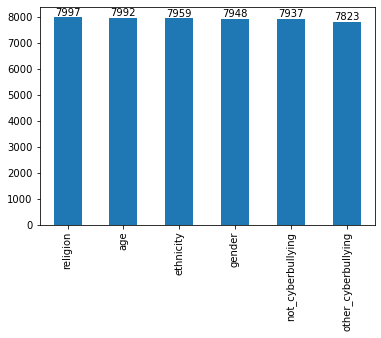

In [140]:
# Compare number of types
ax = tweeter_df['type'].value_counts().plot.bar()
for c in ax.containers:
    ax.bar_label(c)

In [141]:
# Remove type other_cyberbullying as it impact prediction result
tweeter_df = tweeter_df[tweeter_df['type'] != 'other_cyberbullying']

tweeter_df[['type']].value_counts()

type             
religion             7997
age                  7992
ethnicity            7959
gender               7948
not_cyberbullying    7937
dtype: int64

In [142]:
# Copy emoji to new column
import emoji
import demoji

# This function return emoji
def get_emojis(text):
    return ''.join(chars for chars in emoji.distinct_emoji_list(text))

# This function convert emoji to text
def get_emoji_text(emojis):
    emoji_dict = demoji.findall(emojis)
    values = emoji_dict.values()
    return ' '.join(string for string in values)

emojis = []
emojis_text = []

for t in tweeter_df.text:
    emo = get_emojis(t)
    emojis.append(emo)
    emojis_text.append(get_emoji_text(emo))
    
# Print the first 100 emoji
print(emojis[:100],"\n")

# Print the first 100 emoji text
print(emojis_text[:100])

# Add emojis column to DataFram
tweeter_df['emojis'] = emojis
tweeter_df['emojis_text'] = emojis_text

tweeter_df.head(30)

['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '❤😘', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '😌', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''] 

['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'red heart face blowing a kiss', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'relieved face', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']


,text,type,emojis,emojis_text
0,"In other words #katandandre, your food was cra...",not_cyberbullying,,
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,,
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,,
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,,
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,,
5,"@Raja5aab @Quickieleaks Yes, the test of god i...",not_cyberbullying,,
6,Itu sekolah ya bukan tempat bully! Ga jauh kay...,not_cyberbullying,,
7,Karma. I hope it bites Kat on the butt. She is...,not_cyberbullying,,
8,@stockputout everything but mostly my priest,not_cyberbullying,,
9,Rebecca Black Drops Out of School Due to Bully...,not_cyberbullying,,


In [143]:
# Check number of text with emoji
emoji_text = len(tweeter_df[tweeter_df['emojis_text'] != ''])
non_emoji_text = len(tweeter_df[tweeter_df['emojis_text'] == ''])
print("Text with emoji is", emoji_text)
print("Text without emoji is", non_emoji_text)

Text with emoji is 303
Text without emoji is 39530


In [144]:
# Analyze emoji and bully type
bully_emoji_text = tweeter_df[tweeter_df['emojis_text'] != '']
bully_emoji_text = len(bully_emoji_text[bully_emoji_text['type'] != 'not_cyberbullying'])

nonbully_emoji_text = tweeter_df[tweeter_df['emojis_text'] != '']
nonbully_emoji_text = len(nonbully_emoji_text[nonbully_emoji_text['type'] == 'not_cyberbullying'])

print("Bully emoji text is", bully_emoji_text)
print("Non-bully emoji text is", nonbully_emoji_text)

bully_nonemoji_text = tweeter_df[tweeter_df['emojis_text'] == '']
bully_nonemoji_text = len(bully_nonemoji_text[bully_nonemoji_text['type'] != 'not_cyberbullying'])

nonbully_nonemoji_text = tweeter_df[tweeter_df['emojis_text'] == '']
nonbully_nonemoji_text = len(nonbully_nonemoji_text[nonbully_nonemoji_text['type'] == 'not_cyberbullying'])

print("Bully non-emoji text is", bully_nonemoji_text)
print("Non-bully non-emoji text is", nonbully_nonemoji_text)

Bully emoji text is 79
Non-bully emoji text is 224
Bully non-emoji text is 31817
Non-bully non-emoji text is 7713


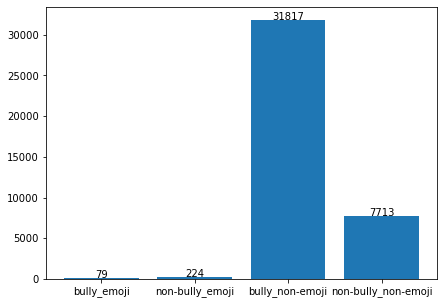

In [145]:
# Analyze emoji
import matplotlib.pyplot as plt
import seaborn as sns

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

plt.figure(figsize=(7,5))
# ax = sns.countplot(x='type', data=tweeter_df[tweeter_df['type'] != 'not_cyberbullying'])
x = ['bully_emoji', 'non-bully_emoji', 'bully_non-emoji', 'non-bully_non-emoji']
y = [bully_emoji_text, nonbully_emoji_text, bully_nonemoji_text, nonbully_nonemoji_text]
plt.bar(x, y)
addlabels(x, y)
plt.show()

In [146]:
######### Text cleansing ##########
def remove_emoji(text):
    return emoji.replace_emoji(text, '')
#     return emoji.demojize(text, delimiters=(' ',' '))

# Import regular expression
import re
# Regular expression to find pattern and process words

def remove_URL(text):
    return re.sub(r"((www.[^s]+)|(http\S+))","",text)

def remove_hashtag(text):
    return str(text).replace('#', '')

def remove_repeat_space(text):
    return re.sub("\s\s+", " ", text)

def remove_numeric(text):
    return re.sub('[0-9]+', '', text)

# Import string library
import string

# Remove punctuation !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
def remove_punctuation(text):
#     print(f"Removing '{string.punctuation}' in text")
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# Import contractions
import contractions

def remove_contractions(text):
    words = text.split()
    return ' '.join([contractions.fix(word) for word in words])

############## NLP ################
# Import SnowballStemmer and Word Tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
import nltk
from nltk import pos_tag

# Stemming - reduce words to their root using Porter2 (snowball stemmer)
# ex, "learning" and "learner" share the root "learn"
nltk.download('punkt')
def stemmer(text):
    stemmer = SnowballStemmer("english")
    words = word_tokenize(text)
    return ' '.join([stemmer.stem(word) for word in words])

# Import Lemmatizer
from nltk.stem import WordNetLemmatizer

# Lemmatizing - reduce words to their core meaning
# ex, better => good, rocks => rock
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
def lemmatizer(text):
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text)
    pt = pos_tag(words)
    lemmas = []
    for word, tag in pt:
        wordntag = tag[0].lower()
        wordntag = wordntag if wordntag in ['a', 'r', 'n', 'v'] else None
        if wordntag:
            lemma = lemmatizer.lemmatize(word, wordntag)
        else:
            lemma = word
        lemmas.append(lemma)
    return ' '.join(lemmas)

# Combine all text cleansing function
def text_cleansing(text):
    text = remove_emoji(text)
    text = remove_URL(text)
    text = remove_hashtag(text)
    text = remove_repeat_space(text)
    text = remove_numeric(text)
    text = remove_punctuation(text)
    text = remove_contractions(text)
    text = stemmer(text)
    text = lemmatizer(text)
    return text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\apiny\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\apiny\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\apiny\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\apiny\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [147]:
######### Unit test for text cleansing functions ###########
def unit_test():
    test_text = "Kids Love😘❤ @ Mohamad Bin Zayed City"
    function_name = 'emojis'
    print(f"Remove {function_name} function test:")
    print("============================")
    print(f"Original text: {test_text}")
    print(f"Processed text: {remove_emoji(test_text)}\n")

    test_text = "Best pick up line? Hi, you're cute... ?: I love how people call James Potter is a bully.- mypatronusisyou: http://tumblr.com/xol3xl14zy"
    function_name = 'URL'
    print(f"Remove {function_name} function test:")
    print("============================")
    print(f"Original text: {test_text}")
    print(f"Processed text: {remove_URL(test_text)}\n")

    test_text = "BULLSHIT!!!! #MKR #MKR2015"
    function_name = 'hashtag'
    print(f"Remove {function_name} function test:")
    print("============================")
    print(f"Original text: {test_text}")
    print(f"Processed text: {remove_hashtag(test_text)}\n")

    test_text = "@ShariRomine @emaleroland @dehneh1   Got it!  I'm learning."
    function_name = 'repeat spaces'
    print(f"Remove {function_name} function test:")
    print("============================")
    print(f"Original text: {test_text}")
    print(f"Processed text: {remove_repeat_space(test_text)}\n")

    test_text = "@__QN i work monday 2-7, yayyy i get to see you again :) this is more than i saw you at school :O"
    function_name = 'numerics'
    print(f"Remove {function_name} function test:")
    print("============================")
    print(f"Original text: {test_text}")
    print(f"Processed text: {remove_numeric(test_text)}\n")

    test_text = "@__QN i work monday 2-7, yayyy i get to see you again :) this is more than i saw you at school :O"
    function_name = 'punctuation'
    print(f"Remove {function_name} function test:")
    print("============================")
    print(f"Original text: {test_text}")
    print(f"Processed text: {remove_punctuation(test_text)}\n")

    test_text = "Children's childrens' I can't believe people are still surprised that Annie and Lloyd can't cook! #mkr"
    function_name = 'contractions'
    print(f"Remove {function_name} function test:")
    print("============================")
    print(f"Original text: {test_text}")
    print(f"Processed text: {remove_contractions(test_text)}\n")

    test_text = "Today in 1910  Dr. Crippen is convicted at the Old Bailey of poisoning his wife and is subsequently hanged at Pentonville Prison in London."
    function_name = 'Words stemming'
    print(f"{function_name} function test:")
    print("============================")
    print(f"Original text: {test_text}")
    print(f"Processed text: {stemmer(test_text)}\n")

    test_text = "better Today in 1910  Dr. Crippen is convicted at the Old Bailey of poisoning his wife and is subsequently hanged at Pentonville Prison in London."
    function_name = 'Words lemmatizing'
    print(f"{function_name} function test:")
    print("============================")
    print(f"Original text: {test_text}")
    print(f"Processed text: {lemmatizer(test_text)}\n")

In [148]:
# Run unit test
unit_test()

Remove emojis function test:
Original text: Kids Love😘❤ @ Mohamad Bin Zayed City
Processed text: Kids Love @ Mohamad Bin Zayed City

Remove URL function test:
Original text: Best pick up line? Hi, you're cute... ?: I love how people call James Potter is a bully.- mypatronusisyou: http://tumblr.com/xol3xl14zy
Processed text: Best pick up line? Hi, you're cute... ?: I love how people call James Potter is a bully.- mypatronusisyou: 

Remove hashtag function test:
Original text: BULLSHIT!!!! #MKR #MKR2015
Processed text: BULLSHIT!!!! MKR MKR2015

Remove repeat spaces function test:
Original text: @ShariRomine @emaleroland @dehneh1   Got it!  I'm learning.
Processed text: @ShariRomine @emaleroland @dehneh1 Got it! I'm learning.

Remove numerics function test:
Original text: @__QN i work monday 2-7, yayyy i get to see you again :) this is more than i saw you at school :O
Processed text: @__QN i work monday -, yayyy i get to see you again :) this is more than i saw you at school :O

Remove pu

In [149]:
# Concat Emojis column with text
noemuji_text = []
for text in tweeter_df.text:
    noemuji_text.append(remove_emoji(text))
    
tweeter_df['noemuji_text'] = noemuji_text

tweeter_df['text'] = tweeter_df['noemuji_text'] + ' ' + str(tweeter_df['emojis_text'])

tweeter_df.drop('noemuji_text', axis=1)
                      
tweeter_df.head(30)

,text,type,emojis,emojis_text,noemuji_text
0,"In other words #katandandre, your food was cra...",not_cyberbullying,,,"In other words #katandandre, your food was cra..."
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,,,Why is #aussietv so white? #MKR #theblock #ImA...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,,,@XochitlSuckkks a classy whore? Or more red ve...
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,,,"@Jason_Gio meh. :P thanks for the heads up, b..."
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,,,@RudhoeEnglish This is an ISIS account pretend...
5,"@Raja5aab @Quickieleaks Yes, the test of god i...",not_cyberbullying,,,"@Raja5aab @Quickieleaks Yes, the test of god i..."
6,Itu sekolah ya bukan tempat bully! Ga jauh kay...,not_cyberbullying,,,Itu sekolah ya bukan tempat bully! Ga jauh kay...
7,Karma. I hope it bites Kat on the butt. She is...,not_cyberbullying,,,Karma. I hope it bites Kat on the butt. She is...
8,@stockputout everything but mostly my priest 0...,not_cyberbullying,,,@stockputout everything but mostly my priest
9,Rebecca Black Drops Out of School Due to Bully...,not_cyberbullying,,,Rebecca Black Drops Out of School Due to Bully...


In [150]:
# Perform text cleansing for the original text
clean_text = []
for text in tweeter_df.text:
    clean_text.append(text_cleansing(text))

In [151]:
# Add new column to the dataframe
tweeter_df['clean_text'] = clean_text
tweeter_df.head(5)

,text,type,emojis,emojis_text,noemuji_text,clean_text
0,"In other words #katandandre, your food was cra...",not_cyberbullying,,,"In other words #katandandre, your food was cra...",in other word katandandr your food be crapilic...
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,,,Why is #aussietv so white? #MKR #theblock #ImA...,whi be aussietv so white mkr theblock imaceleb...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,,,@XochitlSuckkks a classy whore? Or more red ve...,xochitlsuckkk a classi whore or more red velve...
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,,,"@Jason_Gio meh. :P thanks for the heads up, b...",jasongio meh p thank for the head up but not t...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,,,@RudhoeEnglish This is an ISIS account pretend...,rudhoeenglish this be an isi account pretend t...


In [152]:
# Check duplicated text
tweeter_df['clean_text'].duplicated().sum()

442

In [153]:
# Remove duplicated cleaned text
tweeter_df.drop_duplicates('clean_text', inplace=True)

In [154]:
# Add text length column to the dataframe
length = []

for text in tweeter_df.clean_text:
    text_len = len(text.split())
    length.append(text_len)
    
tweeter_df['length'] = length

tweeter_df.head()

,text,type,emojis,emojis_text,noemuji_text,clean_text,length
0,"In other words #katandandre, your food was cra...",not_cyberbullying,,,"In other words #katandandre, your food was cra...",in other word katandandr your food be crapilic...,14
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,,,Why is #aussietv so white? #MKR #theblock #ImA...,whi be aussietv so white mkr theblock imaceleb...,19
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,,,@XochitlSuckkks a classy whore? Or more red ve...,xochitlsuckkk a classi whore or more red velve...,14
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,,,"@Jason_Gio meh. :P thanks for the heads up, b...",jasongio meh p thank for the head up but not t...,23
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,,,@RudhoeEnglish This is an ISIS account pretend...,rudhoeenglish this be an isi account pretend t...,23


In [155]:
# Analysis text length
print("Maximun text length is", tweeter_df['length'].max())
print("Minimum text length is", tweeter_df['length'].min())
print("Average text lenth is", int(tweeter_df['length'].mean()))

Maximun text length is 332
Minimum text length is 4
Average text lenth is 31


In [156]:
# Remove text with lenght < 3 words
tweeter_df = tweeter_df[tweeter_df['length'] > 2]

print("Maximun text length is", tweeter_df['length'].max())
print("Minimum text length is", tweeter_df['length'].min())
print("Average text lenth is", int(tweeter_df['length'].mean()))

Maximun text length is 332
Minimum text length is 4
Average text lenth is 31


In [174]:
# Remove text with length outside 99% of standard deviation

def remove_outliner(dataframe, column):
    print("Removing outlier from column: " + column)
    print("Number of records before outliners removing:", dataframe.shape[0])
    
    col_mean = dataframe[column].mean()
    col_std = dataframe[column].std()
    
    ninety_nine_percent = (dataframe[column].isnull()) | \
        ((dataframe[column] < col_mean + 2 * col_std) & \
        (dataframe[column] > col_mean - 2 * col_std))
    dataframe = dataframe.loc[ninety_nine_percent,:]
    
    print("Number of records after outliners removing:", dataframe.shape[0],"\n")
    return dataframe

for col in ['length']:
    tweeter_df = remove_outliner(tweeter_df, col)

# Remove text with lenght > 100 words
# tweeter_df = tweeter_df[tweeter_df['length'] < 101]
    
tweeter_df.head()

Removing outlier from column: length
Number of records before outliners removing: 39378
Number of records after outliners removing: 38466 



,text,type,emojis,emojis_text,noemuji_text,clean_text,length,encoded_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying,,,"In other words #katandandre, your food was cra...",in other word katandandr your food be crapilic...,14,3
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,,,Why is #aussietv so white? #MKR #theblock #ImA...,whi be aussietv so white mkr theblock imaceleb...,19,3
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,,,@XochitlSuckkks a classy whore? Or more red ve...,xochitlsuckkk a classi whore or more red velve...,14,3
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,,,"@Jason_Gio meh. :P thanks for the heads up, b...",jasongio meh p thank for the head up but not t...,23,3
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,,,@RudhoeEnglish This is an ISIS account pretend...,rudhoeenglish this be an isi account pretend t...,23,3


In [175]:
# Analysis text length
print("Maximun text length is", tweeter_df['length'].max())
print("Minimum text length is", tweeter_df['length'].min())
print("Average text lenth is", int(tweeter_df['length'].mean()))

Maximun text length is 60
Minimum text length is 4
Average text lenth is 30


In [176]:
# Encoding the labels for type
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

# Add new encoded labels column for types
tweeter_df['encoded_type'] = labelencoder.fit_transform(tweeter_df['type'])

In [177]:
# Print new column
tweeter_df[['type', 'encoded_type']].value_counts()

type               encoded_type
not_cyberbullying  3               7849
religion           4               7838
ethnicity          1               7674
gender             2               7591
age                0               7514
dtype: int64

In [178]:
tweeter_df.head()

,text,type,emojis,emojis_text,noemuji_text,clean_text,length,encoded_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying,,,"In other words #katandandre, your food was cra...",in other word katandandr your food be crapilic...,14,3
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,,,Why is #aussietv so white? #MKR #theblock #ImA...,whi be aussietv so white mkr theblock imaceleb...,19,3
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,,,@XochitlSuckkks a classy whore? Or more red ve...,xochitlsuckkk a classi whore or more red velve...,14,3
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,,,"@Jason_Gio meh. :P thanks for the heads up, b...",jasongio meh p thank for the head up but not t...,23,3
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,,,@RudhoeEnglish This is an ISIS account pretend...,rudhoeenglish this be an isi account pretend t...,23,3


In [179]:
# Identify predictor and target features
X = tweeter_df['clean_text']
y = tweeter_df['encoded_type']

In [180]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Identify train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=50, stratify=y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=50)

In [181]:
y_train

5790     3
42155    1
41086    1
44767    1
32699    0
        ..
32268    0
4262     3
19200    4
18490    4
11021    2
Name: encoded_type, Length: 32696, dtype: int32

[Text(0.5, 0, 'encoded_type'), Text(0, 0.5, 'y_train_count')]

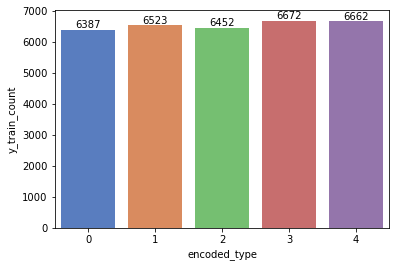

In [182]:
# Imbalance check
plot_data = y_train.value_counts().reset_index()
ax = sns.barplot(x = 'index', y = 'encoded_type', data = plot_data, palette = "muted")
ax.bar_label(ax.containers[0])
ax.set(xlabel = 'encoded_type', ylabel = 'y_train_count')

In [183]:
print(type(X_train))
print(type(y_train))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [184]:
# Import RandomOverSampler
from imblearn.over_sampling import RandomOverSampler
import numpy as np

# Oversampling the training set
oversample = RandomOverSampler()
# X_train, y_train = oversample.fit_resample(X_train, y_train)
X_train, y_train = oversample.fit_resample(np.array(X_train).reshape(-1,1), np.array(y_train).reshape(-1,1))
train_oversample = pd.DataFrame(list(zip([x[0] for x in X_train], y_train)), columns = ['clean_text', 'encoded_type'])

X_train = pd.Series(train_oversample['clean_text'])
y_train = pd.Series(train_oversample['encoded_type'])

type(y_train)

pandas.core.series.Series

[Text(0.5, 0, 'encoded_type'), Text(0, 0.5, 'y_train_count')]

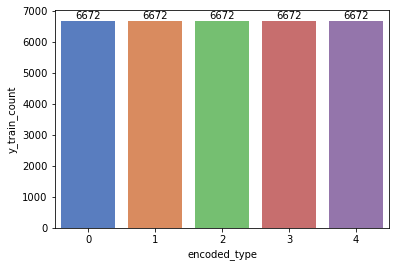

In [185]:
# Imbalance check
plot_data = y_train.value_counts().reset_index()
ax = sns.barplot(x = 'index', y = 'encoded_type', data = plot_data, palette = "muted")
ax.bar_label(ax.containers[0])
ax.set(xlabel = 'encoded_type', ylabel = 'y_train_count')

In [186]:
################### Naive Bays ####################
# Import CountVectorizere
from sklearn.feature_extraction.text import CountVectorizer

countvector = CountVectorizer()
X_train_cv = countvector.fit_transform(X_train)
X_test_cv = countvector.transform(X_test)

# print(X_train_cv)

In [187]:
# Import TfidfTransform
# Tfidf stands for term-frequency times inverse document-frequency.
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer(use_idf = True).fit(X_train_cv)
X_train_tf = tfidf_transformer.transform(X_train_cv)
X_test_tf = tfidf_transformer.transform(X_test_cv)

In [188]:
# Inport Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

nb_multic_lm = MultinomialNB()
nb_multic_lm.fit(X_train_tf, y_train)

MultinomialNB()

In [189]:
# Predict the training data
nb_train_pred = nb_multic_lm.predict(X_train_tf)
type(nb_train_pred)

# Predict the test data
nb_test_pred = nb_multic_lm.predict(X_test_tf)

In [190]:
# Evaluation
# Import classification_report
from sklearn.metrics import classification_report

map_types = ['age', 'ethnicity', 'gender', 'not_cyberbullying', 'religion']
print("Classification Report for train data:\n===================================\n") 
print(f"{classification_report(y_train, nb_train_pred, target_names = map_types)}\n\n")

print("Classification Report for test data:\n===================================\n") 
print(f"{classification_report(y_test, nb_test_pred, target_names = map_types)}\n")

Classification Report for train data:

                   precision    recall  f1-score   support

              age       0.79      0.99      0.88      6672
        ethnicity       0.94      0.91      0.93      6672
           gender       0.93      0.91      0.92      6672
not_cyberbullying       0.95      0.61      0.74      6672
         religion       0.86      0.98      0.92      6672

         accuracy                           0.88     33360
        macro avg       0.89      0.88      0.88     33360
     weighted avg       0.89      0.88      0.88     33360



Classification Report for test data:

                   precision    recall  f1-score   support

              age       0.69      0.98      0.81      1127
        ethnicity       0.90      0.85      0.88      1151
           gender       0.87      0.85      0.86      1139
not_cyberbullying       0.90      0.42      0.57      1177
         religion       0.81      0.97      0.88      1176

         accuracy              

In [222]:
# Prediction function from the model
def get_predicted_result(api_text):
    X_test_api = pd.Series({'clean_text': api_text})
    X_test_api = countvector.transform(X_test_api)
    X_test_api = tfidf_transformer.transform(X_test_api)
    
    return nb_multic_lm.predict(X_test_api)

def is_bully(api_text):    
    y_api_pred = get_predicted_result(api_text)
    
    if map_types[y_api_pred[0]] != 'not_cyberbullying':
        return 'Yes'
    else:
        return 'No'
    
def get_bully_type(api_text):
    y_api_pred = get_predicted_result(api_text)
    return map_types[y_api_pred[0]]

In [223]:
# Example text from api prediction
api_text_1 = "MU is bad"
print(f"Is text 1 '{api_text_1}' bully? => {is_bully(api_text_1)}")
print(f"Text 1 '{api_text_1}' bully type is {get_bully_type(api_text_1)}\n")

api_text_2 = "You are so gay"
print(f"Is text 2 '{api_text_2}' bully? => {is_bully(api_text_2)}")
print(f"Text 2 '{api_text_2}' bully type is {get_bully_type(api_text_2)}\n")

api_text_3 = "Kids go home"
print(f"Is text 3 '{api_text_3}' bully? => {is_bully(api_text_3)}")
print(f"Text 3 '{api_text_3}' bully type is {get_bully_type(api_text_3)}\n")

api_text_4 = "You are stupid"
print(f"Is text 4 '{api_text_4}' bully? => {is_bully(api_text_4)}")
print(f"Text 4 '{api_text_4}' bully type is {get_bully_type(api_text_4)}\n")

api_text_5 = "see you tomorrow"
print(f"Is text 5 '{api_text_5}' bully? => {is_bully(api_text_5)}")
print(f"Text 5 '{api_text_5}' bully type is {get_bully_type(api_text_5)}\n")

Is text 1 'MU is bad' bully? => Yes
Text 1 'MU is bad' bully type is age

Is text 2 'You are so gay' bully? => Yes
Text 2 'You are so gay' bully type is gender

Is text 3 'Kids go home' bully? => No
Text 3 'Kids go home' bully type is not_cyberbullying

Is text 4 'You are stupid' bully? => Yes
Text 4 'You are stupid' bully type is ethnicity

Is text 5 'see you tomorrow' bully? => No
Text 5 'see you tomorrow' bully type is not_cyberbullying



In [224]:
# Save model to file
# import module
import pickle

filename = 'cyberbullying_model.sav'
pickle.dump(nb_multic_lm, open(filename, 'wb'))

countvector_file = 'countvector.sav'
pickle.dump(countvector, open(countvector_file, 'wb'))

tfidf_transformer_file = 'tfidf_transformer.sav'
pickle.dump(tfidf_transformer, open(tfidf_transformer_file, 'wb'))